#Step 1: Import Kaggle Dataset

In [1]:
!pip install wfdb wget

     |████████████████████████████████| 137 kB 5.1 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=9ac200c6957181c340e6580f41ce4a6f4ae3be2fe1056b0b0f6ab9bd3565b117
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d bjoernjostein/georgia-12lead-ecg-challenge-database

 99% 476M/483M [00:05<00:00, 131MB/s]
100% 483M/483M [00:05<00:00, 98.8MB/s]


In [5]:
!kaggle datasets download -d bjoernjostein/st-petersburg-incart-12lead-arrhythmia-database

 99% 560M/564M [00:05<00:00, 124MB/s]
100% 564M/564M [00:05<00:00, 115MB/s]


In [6]:
!kaggle datasets download -d bjoernjostein/ptbxl-electrocardiography-database

 99% 1.34G/1.35G [00:13<00:00, 126MB/s]
100% 1.35G/1.35G [00:13<00:00, 105MB/s]


In [7]:
!kaggle datasets download -d bjoernjostein/ptb-diagnostic-ecg-database

 99% 881M/890M [00:09<00:00, 92.7MB/s]
100% 890M/890M [00:09<00:00, 99.5MB/s]


In [8]:
!kaggle datasets download -d bjoernjostein/china-12lead-ecg-challenge-database

 97% 393M/406M [00:05<00:00, 95.9MB/s]
100% 406M/406M [00:05<00:00, 74.3MB/s]


In [9]:
!kaggle datasets download -d bjoernjostein/china-physiological-signal-challenge-in-2018

 98% 804M/824M [00:07<00:00, 125MB/s]
100% 824M/824M [00:07<00:00, 121MB/s]


In [10]:
!kaggle datasets download -d bjoernjostein/physionet-challenge-2021-snomed-mappings

  0% 0.00/4.13k [00:00<?, ?B/s]
100% 4.13k/4.13k [00:00<00:00, 3.67MB/s]


In [11]:
!kaggle datasets download -d erarayamorenzomuten/physionet-challenge-2021-scoring-metrics-weights

  0% 0.00/878 [00:00<?, ?B/s]
100% 878/878 [00:00<00:00, 1.32MB/s]


In [12]:
!kaggle datasets download -d erarayamorenzomuten/chapmanshaoxing-12lead-ecg-database

 96% 525M/547M [00:07<00:00, 45.8MB/s]
100% 547M/547M [00:07<00:00, 77.7MB/s]


In [13]:
!kaggle datasets download -d erarayamorenzomuten/ningbo-first-hospital-12lead-ecg-database

100% 1.78G/1.78G [00:19<00:00, 114MB/s]
100% 1.78G/1.78G [00:19<00:00, 99.9MB/s]


#Step 2: Load Data

In [14]:
import os, zipfile

dir_name = "./"
extension = ".zip"
 
os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [15]:
import shutil
import os

source = 'Training_2/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [16]:
source = 'Training_PTB/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [17]:
source = 'Training_StPetersburg/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [18]:
source = 'Training_WFDB/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [19]:
source = 'WFDB_ChapmanShaoxing/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
  try:
    shutil.move(source+f, dest1)
  except:
    pass

In [20]:
source = 'WFDB_Ningbo/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
  try:
    shutil.move(source+f, dest1)
  except:
    pass

#Step 3: Packages and Functions

##Loading some packages and defining a function to load data

In [21]:
!pip install ecg-plot
!pip install tensorflow_addons
!pip install keras.utils
!pip install neptune-client

%cd "/content/"
%cd "/content/drive/MyDrive/EMBS/Student Mentoring Program 2021/Meetings/3 - 30 06 21/"
# No need for this script any longer
#import physionet_challenge_utility_script as pc
%cd "/content/"

import ecg_plot
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
import neptune.new as neptune
import os
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import wfdb
import tarfile
import wget
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.sequence import pad_sequences
import math
import warnings
from scipy import signal
import random
import tqdm 
import time
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks
from sklearn.metrics import accuracy_score

%load_ext autoreload
%autoreload
%reload_ext autoreload

     |████████████████████████████████| 1.1 MB 5.1 MB/s 
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=0136efff0b2c05fd6bb28ff582e17c4fa3a616379346e1bccdb1b07d36c71e61
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils
     |████████████████████████████████| 252 kB 5.3 MB/s 
     |████████████████████████████████| 829 kB 73.3 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 170 kB 74.1 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 67 kB 7.2 MB/s 
     |████████████████████████████████| 129 kB 72.8 MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.10.4-py2.py3-none-any.whl size=432190 sha256=2140bd0d90efbeecf135b424053e0db382487ee9f3b533424bd2214fa69a58b5
  Stored in directory: /root/.cache/pip/wheels/b0/9c/47/8f8a6f14aa49ca017a

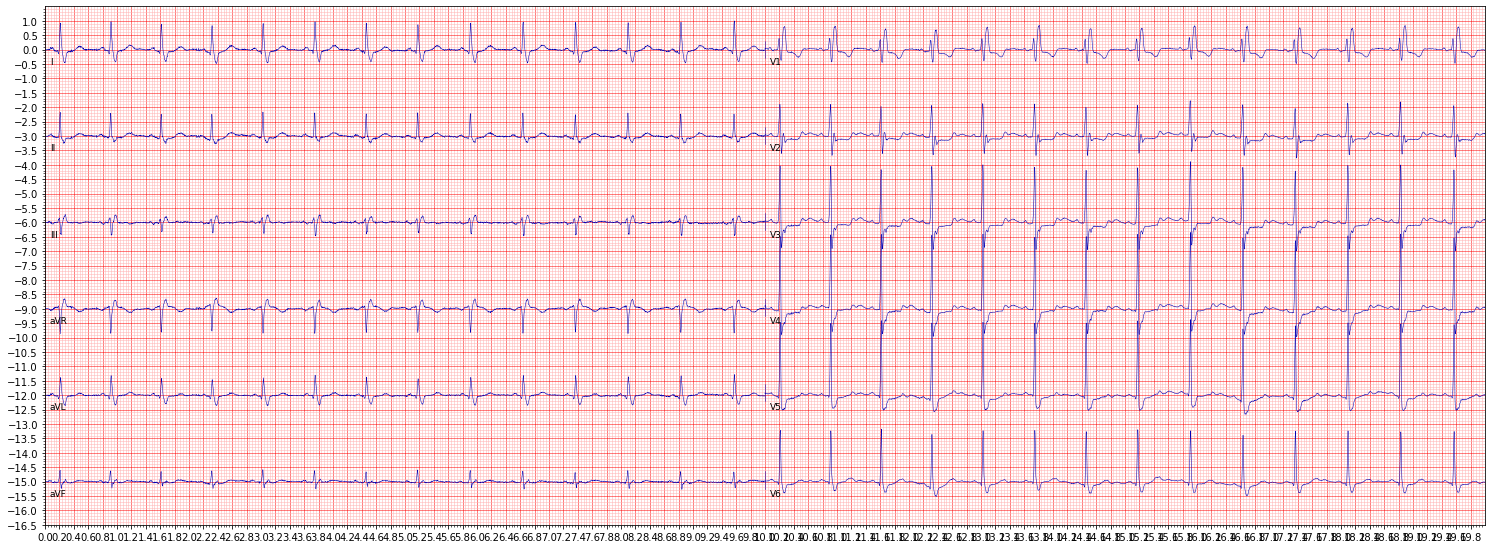

In [22]:
def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data

def plot_ecg(path):
    ecg_data = load_challenge_data(path)
    ecg_plot.plot(ecg_data[0]/1000, sample_rate=500, title='')
    ecg_plot.show()
plot_ecg("WFDB/Q0948.mat")

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

#Data


The training data in this study contains 43.101 Electrocariographic recordings from 5 different sources.



1. Southeast University, China, including the data from the China Physiological Signal Challenge 2018 (2 datasets from this source)
2. St. Petersburg Institute of Cardiological Technics, St. Petersburg, Russia.
3. The Physikalisch Technische Bundesanstalt, Brunswick, Germany. (2 datasets from this source)
4. Georgia 12-Lead ECG Challenge Database, Emory University, Atlanta, Georgia, USA.
5. Shaoxing and Ningbi Hospital, China

The data is given in the form of native Python waveform-database-format WFDB. The dataset contains two file types:

1. Header files (.hea)
2. Signal files (.mat)

We have ca 88 000 Signal file with a corresponding header file. Each file are named with a patient number starting with A0001 and goes all the way up to A6877


##Import all diagnosis to Notebook

In [23]:
def import_key_data():
  gender=[]
  age=[]
  labels=[]
  ecg_filenames=[]
  for ecgfilename in tqdm.tqdm(sorted(os.listdir("./WFDB/"))):
      if ecgfilename.endswith(".mat"):
          data, header_data = load_challenge_data("./WFDB/"+ecgfilename)
          labels.append(header_data[15][5:-1])
          ecg_filenames.append("./WFDB/"+ecgfilename)
          gender.append(header_data[14][6:-1])
          age.append(header_data[13][6:-1])
  return gender, age, labels, ecg_filenames

gender_temp, age_temp, labels_temp, ecg_filenames = import_key_data()
ecg_filenames = np.asarray(ecg_filenames)

100%|██████████| 176506/176506 [02:06<00:00, 1395.49it/s]


From the figure under we can se that the signals varies, but most of the signals are around 5000 samples long

In [24]:
def get_signal_length():
  signal_lenght=[]
  for ecgfilename in sorted(os.listdir("./WFDB/")):
      if ecgfilename.endswith(".mat"):
          data, header_data = load_challenge_data("./WFDB/"+ecgfilename)
          splitted = header_data[0].split()
          signal_lenght.append(int(splitted[3]))
  signal_lenght_df = pd.DataFrame(signal_lenght)
  signal_count=signal_lenght_df[0].value_counts()
  plt.figure(figsize=(20,10))
  sns.barplot(signal_count[:10,].index, signal_count[:10,].values)
  #sns.distplot(signal_lenght_df[0])
  #sns.barplot(signal_lenght_df[0])
  #sns.barplot(signal_count[:12,].index, signal_count[:12,].values)
  plt.ylabel("ECG recordings", fontsize=18)
  plt.xlabel("Signal length (samples)", fontsize=18)
  #plt.savefig("signallengde.png",dpi = 500)
  return signal_lenght_df
  
#signal_lenght = get_signal_length()

From the header file we have access to gender and age from each patient

In [25]:
def clean_gender_data(gender):
  gender = np.asarray(gender)
  gender[np.where(gender == "Male")] = 0
  gender[np.where(gender == "male")] = 0
  gender[np.where(gender == "M")] = 0
  gender[np.where(gender == "Female")] = 1
  gender[np.where(gender == "female")] = 1
  gender[np.where(gender == "F")] = 1
  gender[np.where(gender == "NaN")] = 2
  gender[np.where(gender == "Unknown")] = 2
  np.unique(gender)
  gender = gender.astype(np.int)
  return gender
gender_temp_binary = clean_gender_data(gender_temp)
gender_temp_binary.shape

(88253,)

In [26]:
def clean_age_data(age):
  age = np.asarray(age)
  age[np.where(age == "NaN")] = -1
  np.unique(age)
  age = age.astype(np.int)
  return age
age_temp_clean = clean_age_data(age_temp)
age_temp_clean.shape

(88253,)

#Step 4: Decode SNOMED-CT Codes

All diagnoses are encoded with SNOMED-CT codes. We need a CSV-file to decode them:

In [27]:
def load_header(header_file):
    with open(header_file, 'r') as f:
        header = f.read()
    return header

def get_labels(header):
    labels = list()
    for l in header.split('\n'):
        if l.startswith('#Dx'):
            try:
                entries = l.split(': ')[1].split(',')
                for entry in entries:
                    labels.append(entry.strip())
            except:
                pass
    return labels
    
def is_integer(x):
    if is_number(x):
        return float(x).is_integer()
    else:
        return False
        
def is_number(x):
  try:
      float(x)
      return True
  except (ValueError, TypeError):
      return False

In [28]:
classes = set()
for ecg_file in tqdm.tqdm(ecg_filenames):
  header_file = ecg_file.replace('.mat','.hea')
  header = load_header(header_file)
  classes |= set(get_labels(header))
if all(is_integer(x) for x in classes):
    classes = sorted(classes, key=lambda x: int(x)) # Sort classes numerically if numbers.
else:
    classes = sorted(classes) # Sort classes alphanumerically if not numbers.
num_classes = len(classes)

100%|██████████| 88253/88253 [00:11<00:00, 7446.42it/s] 


In [29]:
SNOMED_scored=pd.read_csv("dx_mapping_scored.csv", sep=",")
lab_arr = np.asarray(SNOMED_scored['SNOMEDCTCode'], dtype="str")
scored_classes = []
for i in classes:
  for j in lab_arr:
    if i == '':
      continue
    if i == j:
      scored_classes.append(i)
scored_classes = sorted(scored_classes)

In [30]:
num_recordings = len(ecg_filenames)
num_classes = len(scored_classes)
labels = np.zeros((num_recordings, num_classes), dtype=np.bool) # One-hot encoding of classes

for i in range(len(ecg_filenames)):
  current_labels = get_labels(load_header(ecg_filenames[i].replace('.mat','.hea')))
  for label in current_labels:
      if label in scored_classes:
          j = scored_classes.index(label)
          labels[i, j] = 1
labels = labels *1

In [31]:
from sklearn.preprocessing import LabelEncoder
def get_labels_for_all_combinations(y):
    y_all_combinations = LabelEncoder().fit_transform([''.join(str(l)) for l in y])
    return y_all_combinations

In [32]:
y_all_comb = get_labels_for_all_combinations(labels)
print("Total number of unique combinations of  the diagnoses: {}".format(len(np.unique(y_all_comb))))

Total number of unique combinations of  the diagnoses: 2745



We will split the data using a 10-fold split with Shuffle=True and random_seed = 42.

The distribution of Training and Val data in each fold is now: (in this study we only use the first fold for hold out validation)


In [33]:
from sklearn.model_selection import StratifiedKFold
def split_data(labels, y_all_combo):
    folds = list(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(labels,y_all_combo))
    print("Training split: {}".format(len(folds[0][0])))
    print("Validation split: {}".format(len(folds[0][1])))
    return folds

In [34]:
folds = split_data(labels, y_all_comb)

Training split: 79427
Validation split: 8826


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [35]:
def plot_all_folds(folds,y,onehot_enc):
    X_axis_labels=onehot_enc
    plt.figure(figsize=(20,100))
    h=1
    for i in range(len(folds)):
        plt.subplot(10,2,h)
        plt.subplots_adjust(hspace=1.0)
        plt.bar(x= X_axis_labels, height=y[folds[i][0]].sum(axis=0))
        plt.title("Distribution of Diagnosis - Training set - Fold {}".format(i+1) ,fontsize="20", color = "black")
        plt.tick_params(axis="both", colors = "black")
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize = 10)
        #plt.xlabel("Diagnosis", color = "white")
        plt.ylabel("Count", color = "black")
        h=h+1
        plt.subplot(10,2,h)
        plt.subplots_adjust(hspace=1.0)
        plt.bar(x= X_axis_labels, height=y[folds[i][1]].sum(axis=0))
        plt.title("Distribution of Diagnosis - Validation set - Fold {}".format(i+1) ,fontsize="20", color = "black")
        plt.tick_params(axis="both", colors = "black")
        #plt.xlabel("Diagnosis", color = "white")
        plt.ylabel("Count", color = "black")
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize = 10)
        h=h+1

In [36]:
#plot_all_folds(folds,labels,scored_classes)

# Visualize data

In [37]:
def abbrev(snomed_classes):
  SNOMED_scored = pd.read_csv("/content/dx_mapping_scored.csv", sep=",")
  snomed_abbr = []
  for j in range(len(snomed_classes)):
      for i in range(len(SNOMED_scored.iloc[:,1])):
          if (str(SNOMED_scored.iloc[:,1][i]) == snomed_classes[j]):
              snomed_abbr.append(SNOMED_scored.iloc[:,0][i])
              
  snomed_abbr = np.asarray(snomed_abbr)
  return snomed_abbr

In [38]:
abbr = abbrev(scored_classes)

In [39]:
def plot_sig(snomed_class, ecg_num, lead, ecg_filenames,  scored_classes , name):
  print(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]])[0][0].shape)
  #ecg_plot.plot_12(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) =="17338001")[0]] == 1)[0][12]])[0][:,:5000]*(1/1000))

  #name = abbrev(scored_classes)

  plt.figure(figsize=(36,6))
  plt.title(name, fontsize="30")
  plt.grid()
  plt.plot(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]])[0][lead]*(1/1000))
  plt.show()

  #ecg_plot.plot_1(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]])[0][lead]*(5/1000))
    
  samp_freq = int(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]])[1][0].split(" ")[2])
  cutoff = 0.1 # remove noise at 0Hz
  T = 1.0 / samp_freq


  data = load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]])[0][lead]
  b, a = signal.butter(4, 100, 'low', analog=True)
  w, h = signal.freqs(b, a)
  data = w
  #data = butter_highpass_filter(data,cutoff,samp_freq)
  N = data.shape[0]


  yf = fft(data)
  xf = fftfreq(N,T)[:N//2]

  fft_res = 2.0/N * np.abs(yf[0:N//2])
  #freq_100 = fft_res[:np.where(xf >= 100)[0][0]]

  plt.figure(figsize=(36,10))
  plt.plot(fft_res[:500])
  plt.show()

In [40]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

from scipy.signal import filtfilt, iirnotch, freqz, butter
from scipy.fftpack import fft, fftshift, fftfreq

In [41]:
'''
SNOMED_scored = pd.read_csv("/content/dx_mapping_scored.csv", sep=",")
SNOMED_unscored = pd.read_csv("/content/dx_mapping_unscored.csv", sep=",")
new_other_labels = []
for i in other_labels:
  for j,k in enumerate(SNOMED_scored.iloc[:,1]):
    print("is " + i + " equal to " + str(k))

    if str(k) == i:
      print("This label is in the current ECG: " + SNOMED_scored.iloc[:,0][j])
      new_other_labels.append(SNOMED_scored.iloc[:,0][j])
  for l,m in enumerate(SNOMED_unscored.iloc[:,1]):
    print("is " + i + " equal to " + str(m))
    if str(m) == i:
      print("This label is in the current ECG: " + SNOMED_unscored.iloc[:,0][l])
      new_other_labels.append(SNOMED_unscored.iloc[:,0][l])

'''


'\nSNOMED_scored = pd.read_csv("/content/dx_mapping_scored.csv", sep=",")\nSNOMED_unscored = pd.read_csv("/content/dx_mapping_unscored.csv", sep=",")\nnew_other_labels = []\nfor i in other_labels:\n  for j,k in enumerate(SNOMED_scored.iloc[:,1]):\n    print("is " + i + " equal to " + str(k))\n\n    if str(k) == i:\n      print("This label is in the current ECG: " + SNOMED_scored.iloc[:,0][j])\n      new_other_labels.append(SNOMED_scored.iloc[:,0][j])\n  for l,m in enumerate(SNOMED_unscored.iloc[:,1]):\n    print("is " + i + " equal to " + str(m))\n    if str(m) == i:\n      print("This label is in the current ECG: " + SNOMED_unscored.iloc[:,0][l])\n      new_other_labels.append(SNOMED_unscored.iloc[:,0][l])\n\n'

In [42]:
def plot_sig_new(snomed_class, ecg_num, lead, ecg_filenames,  scored_classes , name):
  current_filename = ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]]
  
  #ecg_plot.plot_12(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) =="17338001")[0]] == 1)[0][12]])[0][:,:5000]*(1/1000))
  data, head = load_challenge_data(current_filename)
  #print(data.shape)
  data = data[lead]*(1/1000)
  #name = abbrev(scored_classes)

  header_file = current_filename.replace('.mat','.hea')
  header = load_header(header_file)
  other_labels = get_labels(header)

  SNOMED_scored = pd.read_csv("/content/dx_mapping_scored.csv", sep=",")
  SNOMED_unscored = pd.read_csv("/content/dx_mapping_unscored.csv", sep=",")
  new_other_labels = []
  for i in other_labels:
    for j,k in enumerate(SNOMED_scored.iloc[:,1]):
      #print("is " + i + " equal to " + str(k))

      if str(k) == i:
        #print("This label is in the current ECG: " + SNOMED_scored.iloc[:,0][j])
        new_other_labels.append(SNOMED_scored.iloc[:,0][j])
    for l,m in enumerate(SNOMED_unscored.iloc[:,1]):
      #print("is " + i + " equal to " + str(m))
      if str(m) == i:
        #print("This label is in the current ECG: " + SNOMED_unscored.iloc[:,0][l])
        new_other_labels.append(SNOMED_unscored.iloc[:,0][l])


  orden = 10
  fs = int(head[0].split(" ")[2])
  cutoff_frekvens = 100



  b, a = butter_lowpass(cutoff_frekvens, fs, orden)
  EKG_signal = scipy.signal.filtfilt(b, a, data)
  plt.figure(figsize=(36,6))
  plt.title("Raw ECG - Lead II - Primary diagnose: " + name + " | Other diagnoses: " + ' , '.join(new_other_labels), fontsize="20")
  plt.grid()
  plt.plot(EKG_signal)
  plt.show()

  #ecg_plot.plot_1(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]])[0][lead]*(5/1000))
    
  T = 1.0 / fs
  N = EKG_signal.shape[0]


  yf = fft(EKG_signal)
  xf = fftfreq(N,T)[:N//2]

  fft_res = 2.0/N * np.abs(yf[0:N//2])
  #freq_100 = fft_res[:np.where(xf >= 100)[0][0]]

  #plt.figure(figsize=(36,10))
  #plt.plot(fft_res[:500])
  #plt.title("Fourier transformed ECG - Primary diagnose: " + name + " | Other diagnoses: " + ' '.join(new_other_labels), fontsize="30")
  #plt.show()
  #print("------------------------------------------------------------------------------------------------------------------------------------------")
  #print("------------------------------------------------------------------------------------------------------------------------------------------")

In [43]:
def plot_sig_raw(snomed_class, ecg_num, lead, ecg_filenames,  scored_classes , name):
  current_filename = ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) ==snomed_class)[0]] == 1)[0][ecg_num]]
  
  #ecg_plot.plot_12(load_challenge_data(ecg_filenames[np.where(labels[:,np.where(np.asarray(scored_classes) =="17338001")[0]] == 1)[0][12]])[0][:,:5000]*(1/1000))
  data, head = load_challenge_data(current_filename)
  #print(data.shape)
  data = data[lead]
  #name = abbrev(scored_classes)

  header_file = current_filename.replace('.mat','.hea')
  header = load_header(header_file)
  other_labels = get_labels(header)

  SNOMED_scored = pd.read_csv("/content/dx_mapping_scored.csv", sep=",")
  SNOMED_unscored = pd.read_csv("/content/dx_mapping_unscored.csv", sep=",")
  new_other_labels = []
  for i in other_labels:
    for j,k in enumerate(SNOMED_scored.iloc[:,1]):
      #print("is " + i + " equal to " + str(k))

      if str(k) == i:
        #print("This label is in the current ECG: " + SNOMED_scored.iloc[:,0][j])
        new_other_labels.append(SNOMED_scored.iloc[:,0][j])
    for l,m in enumerate(SNOMED_unscored.iloc[:,1]):
      #print("is " + i + " equal to " + str(m))
      if str(m) == i:
        #print("This label is in the current ECG: " + SNOMED_unscored.iloc[:,0][l])
        new_other_labels.append(SNOMED_unscored.iloc[:,0][l])


  order = 1
  fs = int(head[0].split(" ")[2])
  ecg_len = int(head[0].split(" ")[3])
  cutoff_frekvens = 100
  new_fs = 500

  data = signal.resample(data, (ecg_len//fs)*new_fs)
  


  #b, a = butter_lowpass(cutoff_frekvens, new_fs, order)
  #EKG_signal = scipy.signal.filtfilt(b, a, data)
  fig = plt.figure(figsize=(36,6))
  ax = fig.add_subplot(1, 1, 1)
  '''
  major_ticks_x = np.arange(0, data.shape[0], (data.shape[0]/new_fs) * 5 )
  minor_ticks_x = np.arange(0, data.shape[0], (data.shape[0]/new_fs) * 20)

  max_voltage = round(data.max())
  min_voltage = round(data.min())
  #print(max_voltage)
  #print(min_voltage)
  num_yticks = max_voltage - (min_voltage)

  major_ticks_y = np.linspace(min_voltage, max_voltage , abs(num_yticks // 500 ))
  minor_ticks_y = np.linspace(min_voltage, max_voltage,  abs(num_yticks // 100 ))
  #print(num_yticks // 100)
  #print(num_yticks // 500)
  #print(major_ticks_y)
  #print(minor_ticks_y)
  ax.set_xticks(major_ticks_x)
  ax.set_xticks(minor_ticks_x, minor=True)
  ax.set_yticks(major_ticks_y)
  ax.set_yticks(minor_ticks_y, minor=True)
  #ax.grid(which='both')
  ax.grid(which='minor', alpha=0.3,linewidth=1.0, color = "gray")
  ax.grid(which='major', alpha=0.8, linewidth=2.0, color = "black")

  ax.set_yticklabels([])
  ax.set_xticklabels([])
  #plt.figure()
  '''
  plt.title("Raw ECG - Lead II - Primary diagnose: " + name + " | Other diagnoses: " + ' , '.join(new_other_labels), fontsize="20")
  #plt.xticks(ticks)
  #plt.grid()
  plt.xlabel("ms",fontsize="20")
  plt.ylabel("mV",fontsize="20")
  plt.xlim(0,data.shape[0])
  plt.plot(data)
  plt.show()


In [44]:
'''
import scipy
for i,j in enumerate(scored_classes):
  for k in range(15):
    plot_sig_raw(j, ecg_num = k, lead = 1,  ecg_filenames= ecg_filenames, scored_classes = scored_classes, name= abbr[i])
'''

'\nimport scipy\nfor i,j in enumerate(scored_classes):\n  for k in range(15):\n    plot_sig_raw(j, ecg_num = k, lead = 1,  ecg_filenames= ecg_filenames, scored_classes = scored_classes, name= abbr[i])\n'

In [45]:
'''
stored_filenames = []
for i in range(labels.shape[1]):
  ecg_num = 0
  k = 0
  while ecg_num < 5:
    if labels[k,i] == 1:
      stored_filenames.append(ecg_filenames[k])
      ecg_num += 1
    k += 1 
'''

'\nstored_filenames = []\nfor i in range(labels.shape[1]):\n  ecg_num = 0\n  k = 0\n  while ecg_num < 5:\n    if labels[k,i] == 1:\n      stored_filenames.append(ecg_filenames[k])\n      ecg_num += 1\n    k += 1 \n'

In [46]:
#import os
#from zipfile import ZipFile
#zipObj = ZipFile('/content/drive/MyDrive/ecg_file.zip', 'w')

In [47]:
'''
for i in stored_filenames:
  zipObj.write(i)
  zipObj.write(i.replace('.mat','.hea'))
zipObj.close()
'''

"\nfor i in stored_filenames:\n  zipObj.write(i)\n  zipObj.write(i.replace('.mat','.hea'))\nzipObj.close()\n"

#Step 5: Make Batch Generators

To feed the Neural Network with a dataset that is too large for our RAM set we need a batch generator to get data into the RAM in batches. We start by making a "order array" so we can shuffle the order of the data during the training process

In [48]:
def shuffle_batch_generator(batch_size, gen_x, gen_y, num_leads, num_classes): 
    np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 2 * num_leads))
    batch_labels = np.zeros((batch_size,num_classes))
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
            
        yield batch_features, batch_labels

def generate_y_shuffle(y_train):
    while True:
        for i in order_array:
            y_shuffled = y_train[i]
            yield y_shuffled

In [49]:
from scipy.fft import fft, fftfreq

Up and Down Sampling

In [50]:
def generate_X_shuffle(X_train_file, num_leads):
    while True:
        for i in order_array:
          data, header_data = load_challenge_data(X_train_file[i])
          if num_leads == 12:
            ecg = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
          elif num_leads == 6:
            ecg = data[[0,1,2,3,4,5]]
          elif num_leads == 4:
            ecg = data[[0,1,2,7]]
          elif num_leads == 3:
            ecg = data[[0,1,7]]
          elif num_leads == 2:
            ecg = data[[0,1]]

          samp_freq = int(header_data[0].split(" ")[2])
          cutoff = 0.1 # remove noise at 0Hz
          T = 1.0 / samp_freq
          N = ecg.shape[1]
          fourier_sig = np.ones([12,5000])
          for i,j in enumerate(ecg):
              #filt_ecg = butter_highpass_filter(j,cutoff,samp_freq)
              filt_ecg = j
              yf = fft(filt_ecg)
              xf = fftfreq(N,T)[:N//2]
              
              fft_res = 2.0/N * np.abs(yf[0:N//2])
              freq_100 = fft_res[:np.where(xf >= 100)[0][0]]
              #down sample/upsample fourier transformed signal to length 5000
              dwn_smp_sig = signal.resample(freq_100,int(N/(N/5000)))
              fourier_sig[i,:dwn_smp_sig.shape[0]] = dwn_smp_sig

          fourier_sig = fourier_sig.reshape(fourier_sig.shape[1],fourier_sig.shape[0])

          if int(header_data[0].split(" ")[2]) != 500:                        # sampling frequency
            data_new = np.ones([num_leads,                                    # leads
                                  int((int(header_data[0].split(" ")[3])      # samples
                                  /int(header_data[0].split(" ")[2]))*500)])  # sampling frequency ratio
            for k,l in enumerate(ecg):
              data_new[k] = signal.resample(l, int((int(header_data[0].split(" ")[3])/int(header_data[0].split(" ")[2]))*500))
            ecg = data_new
          
          ecg = pad_sequences(ecg, maxlen=5000, truncating='post',padding="post")
          ecg = ecg.reshape(5000,num_leads)
          all_data = np.hstack([fourier_sig,ecg])
          yield all_data

In [51]:
def generate_validation_data(ecg_filenames, y,test_order_array, num_leads):
    y_val=y[test_order_array]
    ecg_filenames_val=ecg_filenames[test_order_array]
    all_ecgs=[]
    for names in ecg_filenames_val:
        data,header_data= load_challenge_data(names)
        if num_leads == 12:
            data = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
        elif num_leads == 6:
            data = data[[0,1,2,3,4,5]]
        elif num_leads == 4:
            data = data[[0,1,2,7]]
        elif num_leads == 3:
            data = data[[0,1,7]]
        elif num_leads == 2:
            data = data[[0,1]]


        samp_freq = int(header_data[0].split(" ")[2])
        cutoff = 0.1 # remove noise at 0Hz
        T = 1.0 / samp_freq
        N = data.shape[1]
        fourier_sig = np.ones([12,5000])
        for i,j in enumerate(data):
            #filt_ecg = butter_highpass_filter(j,cutoff,samp_freq)
            filt_ecg = j
            yf = fft(filt_ecg)
            xf = fftfreq(N,T)[:N//2]
            
            fft_res = 2.0/N * np.abs(yf[0:N//2])
            freq_100 = fft_res[:np.where(xf >= 100)[0][0]]
            #down sample/upsample fourier transformed signal to length 5000
            dwn_smp_sig = signal.resample(freq_100,int(N/(N/5000)))
            fourier_sig[i,:dwn_smp_sig.shape[0]] = dwn_smp_sig

        fourier_sig = fourier_sig.reshape(fourier_sig.shape[1],fourier_sig.shape[0])

        if int(header_data[0].split(" ")[2]) != 500:                        # sampling frequency
          data_new = np.ones([num_leads,                                    # leads
                                int((int(header_data[0].split(" ")[3])      # samples
                                /int(header_data[0].split(" ")[2]))*500)])  # sampling frequency ratio
          for k,l in enumerate(data):
            data_new[k] = signal.resample(l, int((int(header_data[0].split(" ")[3])/int(header_data[0].split(" ")[2]))*500))
          data = data_new
        
        data = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
        data = data.reshape(5000,num_leads)
        all_ecgs.append(data)
        #all_data = np.hstack([fourier_sig,all_ecgs])

    return np.asarray(all_ecgs), y_val
    #return all_data, y_val

In [52]:
def pred_batch_generator(batch_size, gen_x, gen_y, num_leads, labels): 
    #np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 2 * num_leads))
    batch_labels = np.zeros((batch_size,labels.shape[1]))
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        yield batch_features, batch_labels    


def generate_y_pred(y_train, val_index):
    while True:
        for i in val_index:
            y_shuffled = y_train[i]
            yield y_shuffled


def generate_X_pred(X_train_file, num_leads, val_index):
    while True:
        for i in val_index:
          data, header_data = load_challenge_data(X_train_file[i])
          if num_leads == 12:
              data = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
          elif num_leads == 6:
              data = data[[0,1,2,3,4,5]]
          elif num_leads == 4:
              data = data[[0,1,2,7]]
          elif num_leads == 3:
              data = data[[0,1,7]]
          elif num_leads == 2:
              data = data[[0,1]]

          samp_freq = int(header_data[0].split(" ")[2])
          cutoff = 0.1 # remove noise at 0Hz
          T = 1.0 / samp_freq
          N = data.shape[1]
          fourier_sig = np.ones([12,5000])
          for i,j in enumerate(data):
              #filt_ecg = butter_highpass_filter(j,cutoff,samp_freq)
              filt_ecg = j
              yf = fft(filt_ecg)
              xf = fftfreq(N,T)[:N//2]
              
              fft_res = 2.0/N * np.abs(yf[0:N//2])
              freq_100 = fft_res[:np.where(xf >= 100)[0][0]]
              #down sample/upsample fourier transformed signal to length 5000
              dwn_smp_sig = signal.resample(freq_100,int(N/(N/5000)))
              fourier_sig[i,:dwn_smp_sig.shape[0]] = dwn_smp_sig

          fourier_sig = fourier_sig.reshape(fourier_sig.shape[1],fourier_sig.shape[0])

          if int(header_data[0].split(" ")[2]) != 500:                        # sampling frequency
            data_new = np.ones([num_leads,                                    # leads
                                  int((int(header_data[0].split(" ")[3])      # samples
                                  /int(header_data[0].split(" ")[2]))*500)])  # sampling frequency ratio
            for k,l in enumerate(data):
              data_new[k] = signal.resample(l, int((int(header_data[0].split(" ")[3])/int(header_data[0].split(" ")[2]))*500))
            data = data_new
          
          data = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
          data = data.reshape(5000,num_leads)
          all_data = np.hstack([fourier_sig,data])
          yield all_data

# Metrics

In [53]:
def compute_accuracy(labels, outputs):
    num_recordings, num_classes = np.shape(labels)

    num_correct_recordings = 0
    for i in range(num_recordings):
        if np.all(labels[i, :]==outputs[i, :]):
            num_correct_recordings += 1

    return float(num_correct_recordings) / float(num_recordings)

# Compute confusion matrices.
def compute_confusion_matrices(labels, outputs, normalize=False):
    # Compute a binary confusion matrix for each class k:
    #
    #     [TN_k FN_k]
    #     [FP_k TP_k]
    #
    # If the normalize variable is set to true, then normalize the contributions
    # to the confusion matrix by the number of labels per recording.
    num_recordings, num_classes = np.shape(labels)

    if not normalize:
        A = np.zeros((num_classes, 2, 2))
        for i in range(num_recordings):
            for j in range(num_classes):
                if labels[i, j]==1 and outputs[i, j]==1: # TP
                    A[j, 1, 1] += 1
                elif labels[i, j]==0 and outputs[i, j]==1: # FP
                    A[j, 1, 0] += 1
                elif labels[i, j]==1 and outputs[i, j]==0: # FN
                    A[j, 0, 1] += 1
                elif labels[i, j]==0 and outputs[i, j]==0: # TN
                    A[j, 0, 0] += 1
                else: # This condition should not happen.
                    raise ValueError('Error in computing the confusion matrix.')
    else:
        A = np.zeros((num_classes, 2, 2))
        for i in range(num_recordings):
            normalization = float(max(np.sum(labels[i, :]), 1))
            for j in range(num_classes):
                if labels[i, j]==1 and outputs[i, j]==1: # TP
                    A[j, 1, 1] += 1.0/normalization
                elif labels[i, j]==0 and outputs[i, j]==1: # FP
                    A[j, 1, 0] += 1.0/normalization
                elif labels[i, j]==1 and outputs[i, j]==0: # FN
                    A[j, 0, 1] += 1.0/normalization
                elif labels[i, j]==0 and outputs[i, j]==0: # TN
                    A[j, 0, 0] += 1.0/normalization
                else: # This condition should not happen.
                    raise ValueError('Error in computing the confusion matrix.')

    return A

# Compute macro F-measure.
def compute_f_measure(labels, outputs):
    num_recordings, num_classes = np.shape(labels)

    A = compute_confusion_matrices(labels, outputs)

    f_measure = np.zeros(num_classes)
    for k in range(num_classes):
        tp, fp, fn, tn = A[k, 1, 1], A[k, 1, 0], A[k, 0, 1], A[k, 0, 0]
        if 2 * tp + fp + fn:
            f_measure[k] = float(2 * tp) / float(2 * tp + fp + fn)
        else:
            f_measure[k] = float('nan')

    if np.any(np.isfinite(f_measure)):
        macro_f_measure = np.nanmean(f_measure)
    else:
        macro_f_measure = float('nan')

    return macro_f_measure, f_measure

# Compute macro AUROC and macro AUPRC.
def compute_auc(labels, outputs):
    num_recordings, num_classes = np.shape(labels)

    # Compute and summarize the confusion matrices for each class across at distinct output values.
    auroc = np.zeros(num_classes)
    auprc = np.zeros(num_classes)

    for k in range(num_classes):
        # We only need to compute TPs, FPs, FNs, and TNs at distinct output values.
        thresholds = np.unique(outputs[:, k])
        thresholds = np.append(thresholds, thresholds[-1]+1)
        thresholds = thresholds[::-1]
        num_thresholds = len(thresholds)

        # Initialize the TPs, FPs, FNs, and TNs.
        tp = np.zeros(num_thresholds)
        fp = np.zeros(num_thresholds)
        fn = np.zeros(num_thresholds)
        tn = np.zeros(num_thresholds)
        fn[0] = np.sum(labels[:, k]==1)
        tn[0] = np.sum(labels[:, k]==0)

        # Find the indices that result in sorted output values.
        idx = np.argsort(outputs[:, k])[::-1]

        # Compute the TPs, FPs, FNs, and TNs for class k across thresholds.
        i = 0
        for j in range(1, num_thresholds):
            # Initialize TPs, FPs, FNs, and TNs using values at previous threshold.
            tp[j] = tp[j-1]
            fp[j] = fp[j-1]
            fn[j] = fn[j-1]
            tn[j] = tn[j-1]

            # Update the TPs, FPs, FNs, and TNs at i-th output value.
            while i < num_recordings and outputs[idx[i], k] >= thresholds[j]:
                if labels[idx[i], k]:
                    tp[j] += 1
                    fn[j] -= 1
                else:
                    fp[j] += 1
                    tn[j] -= 1
                i += 1

        # Summarize the TPs, FPs, FNs, and TNs for class k.
        tpr = np.zeros(num_thresholds)
        tnr = np.zeros(num_thresholds)
        ppv = np.zeros(num_thresholds)
        for j in range(num_thresholds):
            if tp[j] + fn[j]:
                tpr[j] = float(tp[j]) / float(tp[j] + fn[j])
            else:
                tpr[j] = float('nan')
            if fp[j] + tn[j]:
                tnr[j] = float(tn[j]) / float(fp[j] + tn[j])
            else:
                tnr[j] = float('nan')
            if tp[j] + fp[j]:
                ppv[j] = float(tp[j]) / float(tp[j] + fp[j])
            else:
                ppv[j] = float('nan')

        # Compute AUROC as the area under a piecewise linear function with TPR/
        # sensitivity (x-axis) and TNR/specificity (y-axis) and AUPRC as the area
        # under a piecewise constant with TPR/recall (x-axis) and PPV/precision
        # (y-axis) for class k.
        for j in range(num_thresholds-1):
            auroc[k] += 0.5 * (tpr[j+1] - tpr[j]) * (tnr[j+1] + tnr[j])
            auprc[k] += (tpr[j+1] - tpr[j]) * ppv[j+1]

    # Compute macro AUROC and macro AUPRC across classes.
    if np.any(np.isfinite(auroc)):
        macro_auroc = np.nanmean(auroc)
    else:
        macro_auroc = float('nan')
    if np.any(np.isfinite(auprc)):
        macro_auprc = np.nanmean(auprc)
    else:
        macro_auprc = float('nan')

    return macro_auroc, macro_auprc, auroc, auprc

# Compute a modified confusion matrix for multi-class, multi-label tasks.
def compute_modified_confusion_matrix(labels, outputs):
    # Compute a binary multi-class, multi-label confusion matrix, where the rows
    # are the labels and the columns are the outputs.
    num_recordings, num_classes = np.shape(labels)
    A = np.zeros((num_classes, num_classes))

    # Iterate over all of the recordings.
    for i in range(num_recordings):
        # Calculate the number of positive labels and/or outputs.
        normalization = float(max(np.sum(np.any((labels[i, :], outputs[i, :]), axis=0)), 1))
        # Iterate over all of the classes.
        for j in range(num_classes):
            # Assign full and/or partial credit for each positive class.
            if labels[i, j]:
                for k in range(num_classes):
                    if outputs[i, k]:
                        A[j, k] += 1.0/normalization

    return A

# Compute the evaluation metric for the Challenge.
def compute_challenge_metric(weights, labels, outputs, classes, sinus_rhythm):
    num_recordings, num_classes = np.shape(labels)
    if sinus_rhythm in classes:
        sinus_rhythm_index = classes.index(sinus_rhythm)
    else:
        raise ValueError('The sinus rhythm class is not available.')

    # Compute the observed score.
    A = compute_modified_confusion_matrix(labels, outputs)
    observed_score = np.nansum(weights * A)

    # Compute the score for the model that always chooses the correct label(s).
    correct_outputs = labels
    A = compute_modified_confusion_matrix(labels, correct_outputs)
    correct_score = np.nansum(weights * A)

    # Compute the score for the model that always chooses the sinus rhythm class.
    inactive_outputs = np.zeros((num_recordings, num_classes), dtype=np.bool)
    inactive_outputs[:, sinus_rhythm_index] = 1
    A = compute_modified_confusion_matrix(labels, inactive_outputs)
    inactive_score = np.nansum(weights * A)

    if correct_score != inactive_score:
        normalized_score = float(observed_score - inactive_score) / float(correct_score - inactive_score)
    else:
        normalized_score = 0.0

    return normalized_score

def load_weights(weight_file):
    # Load the table with the weight matrix.
    rows, cols, values = load_table(weight_file)

    # Split the equivalent classes.
    rows = [set(row.split('|')) for row in rows]
    cols = [set(col.split('|')) for col in cols]
    assert(rows == cols)

    # Identify the classes and the weight matrix.
    classes = rows
    weights = values

    return classes, weights

def load_table(table_file):
    # The table should have the following form:
    #
    # ,    a,   b,   c
    # a, 1.2, 2.3, 3.4
    # b, 4.5, 5.6, 6.7
    # c, 7.8, 8.9, 9.0
    #
    table = list()
    with open(table_file, 'r') as f:
        for i, l in enumerate(f):
            arrs = [arr.strip() for arr in l.split(',')]
            table.append(arrs)

    # Define the numbers of rows and columns and check for errors.
    num_rows = len(table)-1
    if num_rows<1:
        raise Exception('The table {} is empty.'.format(table_file))
    row_lengths = set(len(table[i])-1 for i in range(num_rows))
    if len(row_lengths)!=1:
        raise Exception('The table {} has rows with different lengths.'.format(table_file))
    num_cols = min(row_lengths)
    if num_cols<1:
        raise Exception('The table {} is empty.'.format(table_file))

    # Find the row and column labels.
    rows = [table[0][j+1] for j in range(num_rows)]
    cols = [table[i+1][0] for i in range(num_cols)]

    # Find the entries of the table.
    values = np.zeros((num_rows, num_cols), dtype=np.float64)
    for i in range(num_rows):
        for j in range(num_cols):
            value = table[i+1][j+1]
            if is_finite_number(value):
                values[i, j] = float(value)
            else:
                values[i, j] = float('nan')

    return rows, cols, values

def is_finite_number(x):
    if is_number(x):
        return np.isfinite(float(x))
    else:
        return False
def is_number(x):
    try:
        float(x)
        return True
    except (ValueError, TypeError):
        return False

In [54]:
def restructure_labels_and_pred(labels, y_pred, scored_classes):

  weigth_list= ['164889003', '164890007','6374002', '426627000',
        ['164909002', '733534002'], ['59118001', '713427006'],
        '270492004', '713426002','39732003', '445118002',
        '164947007', '251146004', '111975006', '698252002',
        '426783006', ['63593006', '284470004'], '10370003',
        '365413008', ['17338001', '427172004'], '164917005',
        '47665007', '427393009', '426177001', '427084000',
        '164934002', '59931005']

  metric_labels = np.zeros((labels.shape[0],len(weigth_list)))
  metric_pred = np.zeros((y_pred.shape[0],len(weigth_list)))
  for i,j in enumerate(weigth_list):
    if len(j) == 2:
      if j[0] and j[1] in scored_classes:
        m = scored_classes.index(j[0])
        n = scored_classes.index(j[1])
        metric_labels[:,i] = labels[:,m] | labels[:,n]
        metric_pred[:,i] = np.mean([y_pred[:,m], y_pred[:,n]] , axis=0)
      elif j[0] in scored_classes:
        l = scored_classes.index(j[0])
        metric_labels[:,i] = labels[:,l]
        metric_pred[:,i] = y_pred[:,l]
      elif j[1] in scored_classes:
        l = scored_classes.index(j[1])
        metric_labels[:,i] = labels[:,l]
        metric_pred[:,i] = y_pred[:,l]
      else:
        metric_labels[:,i] = np.zeros(labels.shape[0])
        metric_pred[:,i] = np.zeros(y_pred.shape[0])
        print(f"element {i} in weights could not be found")

    else:
      if j in scored_classes:
        l = scored_classes.index(j)
        metric_labels[:,i] = labels[:,l]
        metric_pred[:,i] = y_pred[:,l]
      else:
        metric_labels[:,i] = np.zeros(labels.shape[0])
        metric_pred[:,i] = np.zeros(y_pred.shape[0])
        print(f"element {i} in weights could not be found")

  return metric_labels, metric_pred


In [55]:
from scipy import optimize
def thr_chall_metrics(thr, label, output_prob,weights,sinus_rhythm,classes):
    return -compute_challenge_metric(weights, label, (output_prob >= thr), classes, sinus_rhythm)


#Step 6: Calculate Weight

To compensate for the imbalaced data we calculate a weight for each label. The weight decides how much the Neural Network will learn from the different data labels

In [56]:
from sklearn.utils.class_weight import compute_class_weight
def calculating_class_weights(y_true):
    number_dim = np.shape(y_true)[1]
    weights = np.empty([number_dim, 2])
    for i in range(number_dim):
        weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])
    return weights

In [57]:
new_weights=calculating_class_weights(labels)

In [58]:
keys = np.arange(0,labels.shape[1],1)
weight_dictionary = dict(zip(keys, new_weights.T[1]))
weight_dictionary

{0: 29.795070898041864,
 1: 23.139223911903514,
 2: 8.397050428163654,
 3: 5.269465010747552,
 4: 34.44691647150663,
 5: 21.255539499036608,
 6: 3.7663451689996585,
 7: 112.56760204081633,
 8: 66.9597875569044,
 9: 27.59631019387117,
 10: 12.486276174306735,
 11: 14.510522854324236,
 12: 69.16379310344827,
 13: 5.782531778272834,
 14: 2.332514007823237,
 15: 149.5813559322034,
 16: 1.5231265748507128,
 17: 4.569379724552138,
 18: 34.50078186082877,
 19: 11.64287598944591,
 20: 20.185956084172005,
 21: 34.473828125,
 22: 14.462962962962964,
 23: 11.062045625470043,
 24: 196.99330357142858,
 25: 84.53352490421456,
 26: 24.958427601809955,
 27: 23.762250942380184,
 28: 24.804103428892635,
 29: 207.16666666666666}

#Step 7: Reduce Learning Rate

To controll the learning rate we use learning rate reduction and early stopping to prevent overfitting

In [59]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_F1-score(0.5)', factor=0.1, patience=1, verbose=1, mode='max',
    min_delta=0.0001, cooldown=0, min_lr=0
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_F1-score(0.5)', mode='max', verbose=1, patience=2)

#Step 8: Additional functions

In [60]:
import tensorflow_addons as tfa

In [61]:
def FCN(labels, leads):
    inputlayer = keras.layers.Input(shape=(5000,leads)) 

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=8,input_shape=(5000,leads), padding='same')(inputlayer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation(activation='relu')(conv1)

    conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation('relu')(conv2)

    conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation('relu')(conv3)

    gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)


    outputlayer = keras.layers.Dense(labels, activation='sigmoid')(gap_layer)

    model = keras.Model(inputs=inputlayer, outputs=outputlayer)
  


    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
        name='accuracy', dtype=None, threshold=0.5),
        tfa.metrics.F1Score(name = "F1-score(0.1)", num_classes =labels ,threshold = 0.1, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.2)", num_classes =labels ,threshold = 0.2, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.3)", num_classes =labels ,threshold = 0.3, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.4)", num_classes =labels ,threshold = 0.4, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.5)", num_classes =labels ,threshold = 0.5, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.6)", num_classes =labels ,threshold = 0.6, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.7)", num_classes =labels ,threshold = 0.7, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.8)", num_classes =labels ,threshold = 0.8, average="macro"),
        tfa.metrics.F1Score(name = "F1-score(0.9)", num_classes =labels ,threshold = 0.9, average="macro")
        ])

    return model

## Other models to test

In [62]:
def encoder_bin_2(n_input_1, n_input_2, n_output):
    input_1=tf.keras.layers.Input(shape=(n_input_1))
    input_2=tf.keras.layers.Input(shape=(n_input_2))
     # conv block -1
    conv1 = tf.keras.layers.Conv1D(filters=128,kernel_size=5,strides=1,padding='same')(input_1)
    conv1 = tfa.layers.InstanceNormalization()(conv1)
    conv1 = tf.keras.layers.PReLU(shared_axes=[1])(conv1)
    conv1 = tf.keras.layers.SpatialDropout1D(rate=0.2)(conv1)
    conv1 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv1)
    # conv block -2
    conv2 = tf.keras.layers.Conv1D(filters=256,kernel_size=11,strides=1,padding='same')(conv1)
    conv2 = tfa.layers.InstanceNormalization()(conv2)
    conv2 = tf.keras.layers.PReLU(shared_axes=[1])(conv2)
    conv2 = tf.keras.layers.Dropout(rate=0.2)(conv2)
    conv2 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv2)
    # conv block -3
    conv3 = tf.keras.layers.Conv1D(filters=512,kernel_size=21,strides=1,padding='same')(conv2)
    conv3 = tfa.layers.InstanceNormalization()(conv3)
    conv3 = tf.keras.layers.PReLU(shared_axes=[1])(conv3)
    conv3 = tf.keras.layers.SpatialDropout1D(rate=0.2)(conv3)
    # split for attention
    attention_data = tf.keras.layers.Lambda(lambda x: x[:,:,:])(conv3)
    attention_softmax = tf.keras.layers.Lambda(lambda x: x[:,:,:])(conv3)
    # attention mechanism
    attention_softmax = tf.keras.layers.Softmax()(attention_softmax)
    multiply_layer = tf.keras.layers.Multiply()([attention_softmax,attention_data])
    # last layer
    dense_layer = tf.keras.layers.Dense(units=512,activation='relu')(multiply_layer)
    dense_layer = tfa.layers.InstanceNormalization()(dense_layer)
    # output layer
    flatten_layer = tf.keras.layers.Flatten()(dense_layer)

    mod1 = tf.keras.Model(inputs=input_1, outputs=flatten_layer)

    mod2 = tf.keras.layers.Dense(n_input_2, activation="relu")(input_2)
    mod2 = keras.models.Model(inputs=input_2, outputs=mod2)

    combined = keras.layers.concatenate([mod1.output, mod2.output]) 

    output_layer = tf.keras.layers.Dense(units=n_output,activation='sigmoid')(combined)

    model = tf.keras.models.Model(inputs=[mod1.input, mod2.input], outputs=output_layer)

    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

In [63]:
def batch_generator_2(batch_size, gen_x, gen_x2, gen_y, num_leads, num_classes, cc_data_len): 
    #np.random.shuffle(order_array)
    batch_cc = np.zeros((batch_size, cc_data_len))
    batch_features = np.zeros((batch_size,5000, num_leads))
    batch_labels = np.zeros((batch_size,num_classes))
    while True:
        for i in range(batch_size):
            batch_cc[i] = next(gen_x2)
            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        batch_features_comb = [batch_features, batch_cc]
        yield batch_features_comb, batch_labels  

In [64]:
def generate_cc_data(data):
    while True:
        for i in data:
            yield i

In [65]:
def batch_generator(batch_size, gen_x, gen_y, num_leads, num_classes): 
    #np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, num_leads))
    batch_labels = np.zeros((batch_size,num_classes))
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        yield batch_features, batch_labels    

def generate_y(y_train):
    while True:
        for i in y_train:
            yield i

def generate_X_rawecg(X_train_file, num_leads):
    while True:
        for h in X_train_file:
          data, header_data = load_challenge_data(h)
          if num_leads == 12:
              data = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
          elif num_leads == 6:
              data = data[[0,1,2,3,4,5]]
          elif num_leads == 4:
              data = data[[0,1,2,7]]
          elif num_leads == 3:
              data = data[[0,1,7]]
          elif num_leads == 2:
              data = data[[0,1]]

          if int(header_data[0].split(" ")[2]) != 500:
              data_new = np.ones([num_leads,int((int(header_data[0].split(" ")[3])/int(header_data[0].split(" ")[2]))*500)])
              for i,j in enumerate(data):
                  data_new[i] = signal.resample(j, int((int(header_data[0].split(" ")[3])/int(header_data[0].split(" ")[2]))*500))
              data = data_new
          data = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
          #data = data + np.random.choice([0,0,0,np.random.rand(12,5000)*random.randint(0, 50)])
              
          data = data.reshape(data.shape[1],data.shape[0])
          yield data

def generate_X_fourier(X_train_file, num_leads):
    while True:
        for h in X_train_file:
          data, header_data = load_challenge_data(h)
          
          if num_leads == 12:
            ecg = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
          elif num_leads == 6:
            ecg = data[[0,1,2,3,4,5]]
          elif num_leads == 4:
            ecg = data[[0,1,2,7]]
          elif num_leads == 3:
            ecg = data[[0,1,7]]
          elif num_leads == 2:
            ecg = data[[0,1]]

          samp_freq = int(header_data[0].split(" ")[2])
          cutoff = 0.1 # remove noise at 0Hz
          T = 1.0 / samp_freq
          N = ecg.shape[1]
          fourier_sig = np.ones([num_leads,5000])
          for i,j in enumerate(ecg):
              #filt_ecg = butter_highpass_filter(j,cutoff,samp_freq)
              filt_ecg = j
              yf = fft(filt_ecg)
              xf = fftfreq(N,T)[:N//2]
              
              fft_res = 2.0/N * np.abs(yf[0:N//2])
              freq_100 = fft_res[:np.where(xf >= 100)[0][0]]
              #down sample/upsample fourier transformed signal to length 5000
              dwn_smp_sig = signal.resample(freq_100,int(N/(N/5000)))
              fourier_sig[i,:dwn_smp_sig.shape[0]] = dwn_smp_sig

          fourier_sig = fourier_sig.reshape(fourier_sig.shape[1],fourier_sig.shape[0])
          yield fourier_sig

In [66]:
def fourier_trans_ecg(data, header, num_leads):

  if num_leads == 12:
    ecg = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
  elif num_leads == 6:
    ecg = data[[0,1,2,3,4,5]]
  elif num_leads == 4:
    ecg = data[[0,1,2,7]]
  elif num_leads == 3:
    ecg = data[[0,1,7]]
  elif num_leads == 2:
    ecg = data[[0,1]]

  samp_freq = int(header[0].split(" ")[2])
  cutoff = 0.1 # remove noise at 0Hz
  T = 1.0 / samp_freq
  N = ecg.shape[1]
  fourier_sig = np.ones([num_leads,5000])
  for i,j in enumerate(ecg):
      #filt_ecg = butter_highpass_filter(j,cutoff,samp_freq)
      filt_ecg = j
      yf = fft(filt_ecg)
      xf = fftfreq(N,T)[:N//2]
      
      fft_res = 2.0/N * np.abs(yf[0:N//2])
      freq_100 = fft_res[:np.where(xf >= 100)[0][0]]
      #down sample/upsample fourier transformed signal to length 5000
      dwn_smp_sig = signal.resample(freq_100,int(N/(N/5000)))
      fourier_sig[i,:dwn_smp_sig.shape[0]] = dwn_smp_sig

  fourier_sig = fourier_sig.reshape(fourier_sig.shape[1],fourier_sig.shape[0])
  return fourier_sig

In [67]:
def preprocess_ecg(data, header, num_leads):
  if num_leads == 12:
      data = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
  elif num_leads == 6:
      data = data[[0,1,2,3,4,5]]
  elif num_leads == 4:
      data = data[[0,1,2,7]]
  elif num_leads == 3:
      data = data[[0,1,7]]
  elif num_leads == 2:
      data = data[[0,1]]

  if int(header[0].split(" ")[2]) != 500:
      data_new = np.ones([num_leads,int((int(header[0].split(" ")[3])/int(header[0].split(" ")[2]))*500)])
      for i,j in enumerate(data):
          data_new[i] = signal.resample(j, int((int(header[0].split(" ")[3])/int(header[0].split(" ")[2]))*500))
      data = data_new
  data = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  #data = data + np.random.choice([0,0,0,np.random.rand(12,5000)*random.randint(0, 50)])
      
  data = data.reshape(data.shape[1],data.shape[0])
  return data

In [68]:
def pan_tompkins(data, fs):
  #fs =  int(ex_head[0].split(" ")[2])
  lowcut = 5.0
  highcut = 15.0
  filter_order = 2
  nyquist_freq = 0.5 * fs

  low = lowcut / nyquist_freq
  high = highcut / nyquist_freq

  b, a = butter(filter_order, [low, high], btype="band")
  y = lfilter(b, a, data)

  diff_y = np.ediff1d(y)
  squared_diff_y=diff_y**2
  integrated_squared_diff_y =np.convolve(squared_diff_y,np.ones(5))

  max_h = integrated_squared_diff_y.max()

  peaks=find_peaks(integrated_squared_diff_y,height=max_h/2, distance=fs/3)

  hr = np.nanmean(60 /(np.diff(peaks[0])/fs)).mean()
  #print(hr)
  #plt.plot(data)
  #plt.plot(peaks[0], data[peaks[0]], "x")
  #plt.show()

  return hr

In [69]:
from sklearn.preprocessing import OneHotEncoder

### 1 Heart rate + Amplitude

In [70]:
def calc_hr(ecg_filenames):
  heart_rate = np.zeros(len(ecg_filenames))
  for i,j in enumerate(ecg_filenames):
    data, head = load_challenge_data(j)
    heart_rate[i] = pan_tompkins(data[1],int(head[0].split(" ")[2]))
  heart_rate[np.where(np.isnan(heart_rate))[0]] = np.nanmean(heart_rate)
  return heart_rate


In [71]:
def calc_hr_predict(data,header):
  heart_rate = pan_tompkins(data[1],int(header[0].split(" ")[2]))
  if heart_rate == "NaN":
    heart_rate = 80
  return heart_rate

In [72]:
def regelmessigVSuregelmessig(labels, abbr):
  atrieflutter = np.where(labels[:,np.where(abbr == 'atrial flutter')[0]] == 1)[0]
  pacerythm = np.where(labels[:,np.where(abbr == 'pacing rhythm')[0]] == 1)[0]
  sinus = np.where(labels[:,np.where(abbr == 'sinus rhythm')[0]] == 1)[0]
  sinus_brad = np.where(labels[:,np.where(abbr == 'sinus bradycardia')[0]] == 1)[0]
  sinus_tach = np.where(labels[:,np.where(abbr == 'sinus tachycardia')[0]] == 1)[0]
  sinus_arr = np.where(labels[:,np.where(abbr == 'sinus arrhythmia')[0]] == 1)[0]
  #------------------------------------------------------------------------------
  regelmessig = np.unique(np.concatenate([atrieflutter,pacerythm,sinus,sinus_brad,sinus_tach,sinus_arr]))
  #------------------------------------------------------------------------------
  afib = np.where(labels[:,np.where(abbr == 'atrial fibrillation')[0]] == 1)[0]
  VES1 = np.where(labels[:,np.where(abbr == 'ventricular premature beats')[0]] == 1)[0]
  VES2 = np.where(labels[:,np.where(abbr == 'premature ventricular contractions')[0]] == 1)[0]
  VES = np.concatenate([VES1,VES2])
  SVES1 = np.where(labels[:,np.where(abbr == 'supraventricular premature beats')[0]] == 1)[0]
  SVES2 = np.where(labels[:,np.where(abbr == 'premature atrial contraction')[0]] == 1)[0]
  SVES = np.concatenate([SVES1,SVES2])
  #------------------------------------------------------------------------------
  uregelmessig = np.unique(np.concatenate([afib,VES,SVES]))
  #------------------------------------------------------------------------------
  del_ureg, del_reg = np.intersect1d(uregelmessig,regelmessig,return_indices=True)[1:]

  uregelmessig = np.delete(uregelmessig, del_ureg)
  regelmessig = np.delete(regelmessig, del_reg)
  return regelmessig, uregelmessig

In [73]:
def rytme_labels(labels, abbr):
  rythm_labels = labels[:,[int(np.where(abbr == 'atrial flutter')[0]),int(np.where(abbr == 'pacing rhythm')[0]), int(np.where(abbr == 'sinus rhythm')[0]),
          int(np.where(abbr == 'sinus bradycardia')[0]), int(np.where(abbr == 'sinus tachycardia')[0]),int(np.where(abbr == 'sinus arrhythmia')[0]),
          int(np.where(abbr == 'atrial fibrillation')[0]), int(np.where(abbr == 'ventricular premature beats')[0]) | int(np.where(abbr == 'premature ventricular contractions')[0]),
          int(np.where(abbr == 'supraventricular premature beats')[0]) | int(np.where(abbr == 'premature atrial contraction')[0])]]
  return rythm_labels

In [74]:
def finn_diagnoser(labels, abbr, navn):
  arr = np.zeros((labels.shape[0],1))
  idx = np.where(labels[:,np.where(abbr == navn)[0]] == 1)[0]
  arr[idx] = 1
  return arr

In [75]:
def train_rythm_model(data, labels,num_leads,batch_size, epochs, signal_len):
  model = encoder_bin((signal_len,num_leads),labels.shape[1])
  model.fit(x=batch_generator(batch_size=batch_size,  gen_x=generate_X_fourier(data, num_leads), 
                              gen_y=generate_y(labels), num_leads=num_leads,num_classes=labels.shape[1]),
                              epochs=epochs, 
                              steps_per_epoch=(len(data)/batch_size))
  model.save("rythm_model.h5")

In [76]:
def regelmessige_diag(ecg_filenames,labels, abbr):
  atrieflutter = np.where(labels[:,np.where(abbr == 'atrial flutter')[0]] == 1)[0]
  pacerythm = np.where(labels[:,np.where(abbr == 'pacing rhythm')[0]] == 1)[0]
  sinus = np.where(labels[:,np.where(abbr == 'sinus rhythm')[0]] == 1)[0]
  sinus_brad = np.where(labels[:,np.where(abbr == 'sinus bradycardia')[0]] == 1)[0]
  sinus_tach = np.where(labels[:,np.where(abbr == 'sinus tachycardia')[0]] == 1)[0]
  sinus_arr = np.where(labels[:,np.where(abbr == 'sinus arrhythmia')[0]] == 1)[0]

  regelmessige_rytmer = np.concatenate([ecg_filenames[atrieflutter],ecg_filenames[pacerythm],
                                    ecg_filenames[sinus],ecg_filenames[sinus_brad],
                                    ecg_filenames[sinus_tach],ecg_filenames[sinus_arr]
                                    ])
  
  regelmessige_rythm_classes = np.zeros((len(regelmessige_rytmer),len([ecg_filenames[atrieflutter],ecg_filenames[pacerythm],
                                    ecg_filenames[sinus],ecg_filenames[sinus_brad],
                                    ecg_filenames[sinus_tach],ecg_filenames[sinus_arr]])))
  counter = 0
  for i,j in enumerate([atrieflutter,pacerythm,sinus,sinus_brad, sinus_tach, sinus_arr]):
    for k in j:

      regelmessige_rythm_classes[counter,i] = 1
      counter += 1

  return regelmessige_rytmer, regelmessige_rythm_classes



In [77]:
def uregelmessige_diag(ecg_filenames, labels, abbr):
  afib = np.where(labels[:,np.where(abbr == 'atrial fibrillation')[0]] == 1)[0]
  VES1 = np.where(labels[:,np.where(abbr == 'ventricular premature beats')[0]] == 1)[0]
  VES2 = np.where(labels[:,np.where(abbr == 'premature ventricular contractions')[0]] == 1)[0]
  VES = np.concatenate([VES1,VES2])
  SVES1 = np.where(labels[:,np.where(abbr == 'supraventricular premature beats')[0]] == 1)[0]
  SVES2 = np.where(labels[:,np.where(abbr == 'premature atrial contraction')[0]] == 1)[0]
  SVES = np.concatenate([SVES1,SVES2])

  uregelmessige_rytmer = np.concatenate([ecg_filenames[afib],ecg_filenames[VES],
                                    ecg_filenames[SVES]])
  
  uregelmessige_rythm_classes = np.zeros((len(uregelmessige_rytmer),len([ecg_filenames[afib],ecg_filenames[VES],
                                    ecg_filenames[SVES]])))
  
  counter = 0
  for i,j in enumerate([afib,VES,SVES]):
    for k in j:

      uregelmessige_rythm_classes[counter,i] = 1
      counter += 1

  return uregelmessige_rytmer, uregelmessige_rythm_classes


In [78]:
def train_rythm_model_2(data, val_data, cc_data, cc_data_val, labels, val_labels,num_leads,batch_size, epochs, signal_len, model_name):
  model = encoder_bin_2((signal_len,num_leads),cc_data.shape[1],labels.shape[1])
  model.fit(x=batch_generator_2(batch_size=batch_size,  gen_x=generate_X_fourier(data, num_leads), gen_x2=generate_cc_data(cc_data), 
                              gen_y=generate_y(labels), num_leads=num_leads,num_classes=labels.shape[1],cc_data_len=cc_data.shape[1]),
                              epochs=epochs, 
                              validation_data=batch_generator_2(batch_size=batch_size,  gen_x=generate_X_rawecg(val_data, num_leads), gen_x2=generate_cc_data(cc_data_val), 
                              gen_y=generate_y(val_labels), num_leads=num_leads,num_classes=labels.shape[1],cc_data_len=cc_data.shape[1]),validation_freq=1,validation_steps = (len(val_data)/batch_size),
                              steps_per_epoch=(len(data)/batch_size))
  model.save(model_name + ".h5")

In [79]:
def train_classifier_chain(data, val_data, cc_data, cc_data_val, labels, val_labels, num_leads,batch_size, epochs, signal_len, model_name):
  model = encoder_bin_2((signal_len,num_leads),cc_data.shape[1],labels.shape[1])
  model.fit(x=batch_generator_2(batch_size=batch_size,  gen_x=generate_X_rawecg(data, num_leads), gen_x2=generate_cc_data(cc_data), 
                              gen_y=generate_y(labels), num_leads=num_leads,num_classes=labels.shape[1],cc_data_len=cc_data.shape[1]),
                              epochs=epochs, 
                              validation_data=batch_generator_2(batch_size=batch_size,  gen_x=generate_X_rawecg(val_data, num_leads), gen_x2=generate_cc_data(cc_data_val), 
                              gen_y=generate_y(val_labels), num_leads=num_leads,num_classes=labels.shape[1],cc_data_len=cc_data.shape[1]),validation_freq=1,validation_steps = (len(val_data)/batch_size),
                              steps_per_epoch=(len(data)/batch_size))
  model.save(model_name + ".h5")

#Step 9: Train The Model

In [ ]:
#-----------------------------------------------------------#
#                                                           #
#            Train Classifier Chain                         #
#                                                           #
#-----------------------------------------------------------#

#----------------------------------------#
# REMEMBER TO CHOOSE YOUR OWN API TOKEN  #
#----------------------------------------#

run = neptune.init(project='SSCP/PhysioNetChallenge2021',
                   # Bjørn-Jostein's API token:
                    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzMGUyN2Q2ZS05MjVkLTRlMzItODYwZS0yODQ3ZWU3ZTdmMmEifQ=='
                   # morenzoe's API token:
                   # api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJjOGQyZDU4OC02ZmEyLTQ3MTUtYWY2Yi0yNjQxMjQwYTJiNGYifQ==' 
                   )

fold = 0
run["Model"] = "ClassifierChain 12-leads"
run["CV fold"] = fold
run["epochs"] = "1 and 1"
run["batch size"] = 30


train_data = ecg_filenames[folds[fold][0]]
train_label = labels[folds[fold][0]]

val_data = ecg_filenames[folds[fold][1]]
val_labels = labels[folds[fold][1]]

#Heart rate
heart_rates = calc_hr(train_data)

#Regelmessig/uregelmessig
regelmessig_ind, uregelmessig_ind = regelmessigVSuregelmessig(train_label, abbr)
ureg_vs_reg_data = np.concatenate([train_data[regelmessig_ind],train_data[uregelmessig_ind]])
ureg_vs_reg_label = np.concatenate([np.ones(len(regelmessig_ind)),np.zeros(len(uregelmessig_ind))])

index_array = np.arange(len(ureg_vs_reg_label))
np.random.shuffle(index_array)
ureg_vs_reg_data = ureg_vs_reg_data[index_array]
ureg_vs_reg_label = ureg_vs_reg_label[index_array]

ureg_vs_reg_label = np.expand_dims(ureg_vs_reg_label, axis=1)
hr_data = np.concatenate([heart_rates[regelmessig_ind],heart_rates[uregelmessig_ind]])
hr_data = np.expand_dims(hr_data,axis=1)
#hr_data = hr_data[index_array]

#Heart rate validation
heart_rates_val = calc_hr(val_data)

#Regelmessig/uregelmessig validation
regelmessig_ind_val, uregelmessig_ind_val = regelmessigVSuregelmessig(val_labels, abbr)
ureg_vs_reg_data_val = np.concatenate([val_data[regelmessig_ind_val],val_data[uregelmessig_ind_val]])
ureg_vs_reg_label_val = np.concatenate([np.ones(len(regelmessig_ind_val)),np.zeros(len(uregelmessig_ind_val))])

ureg_vs_reg_label_val = np.expand_dims(ureg_vs_reg_label_val, axis=1)
hr_data_val = np.concatenate([heart_rates_val[regelmessig_ind_val],heart_rates_val[uregelmessig_ind_val]])
hr_data_val = np.expand_dims(hr_data_val,axis=1)

# Train rythm model
batch_size = 30
num_leads = 12
epochs = 10
signal_len = 5000
train_rythm_model_2(ureg_vs_reg_data,ureg_vs_reg_data_val, hr_data, hr_data_val, ureg_vs_reg_label,ureg_vs_reg_label_val, num_leads,batch_size, epochs, signal_len, model_name = str(num_leads) + "_leads_rythm_model")

# If regelmessig modell
regl_rytm_data , ohe_reg_rythm_classes =regelmessige_diag(train_data ,train_label, abbr)

index_array_2 = np.arange(len(ohe_reg_rythm_classes))
np.random.shuffle(index_array_2)
regl_rytm_data = regl_rytm_data[index_array_2]
ohe_reg_rythm_classes = ohe_reg_rythm_classes[index_array_2]

#val data 
regl_rytm_data_val , ohe_reg_rythm_classes_val =regelmessige_diag(val_data ,val_labels, abbr)

batch_size = 30
num_leads = 12
epochs = 10
signal_len = 5000
train_rythm_model_2(regl_rytm_data,regl_rytm_data_val, hr_data, hr_data_val ,ohe_reg_rythm_classes,ohe_reg_rythm_classes_val, num_leads,batch_size, epochs, signal_len, model_name = str(num_leads) + "_leads_regular_rythm")

# If uregelmessig modell
uregl_rytm_data , ohe_ureg_rythm_classes =uregelmessige_diag(train_data ,train_label, abbr)

index_array_3 = np.arange(len(ohe_ureg_rythm_classes))
np.random.shuffle(index_array_3)
uregl_rytm_data = uregl_rytm_data[index_array_3]
ohe_ureg_rythm_classes = ohe_ureg_rythm_classes[index_array_3]

#val data 
uregl_rytm_data_val , ohe_ureg_rythm_classes_val =uregelmessige_diag(val_data ,val_labels, abbr)

batch_size = 30
num_leads = 12
epochs = 10
signal_len = 5000
train_rythm_model_2(uregl_rytm_data,uregl_rytm_data_val,hr_data,hr_data_val,ohe_ureg_rythm_classes,ohe_ureg_rythm_classes_val, num_leads,batch_size, epochs, signal_len, model_name = str(num_leads) + "_leads_irregular_rhythm")

# Classify all other classes
labels_rytme = rytme_labels(labels=train_label,abbr=abbr)

other_diag = ["bundle branch block","bradycardia","1st degree av block", "incomplete right bundle branch block", "left axis deviation", "left anterior fascicular block", "left bundle branch block", "low qrs voltages",
"nonspecific intraventricular conduction disorder", "poor R wave Progression", "prolonged pr interval", "prolonged qt interval", "qwave abnormal", "right axis deviation", "right bundle branch block", "t wave abnormal", "t wave inversion"]

# Val rytme
labels_rytme_val = rytme_labels(labels=val_labels,abbr=abbr)

cc_data = labels_rytme
cc_data_val = labels_rytme_val
for i in other_diag:
  new_diag = finn_diagnoser(train_label,abbr,i)
  new_diag_val = finn_diagnoser(val_labels,abbr,i)
  batch_size = 30
  num_leads = 12
  epochs = 5
  signal_len = 5000
  name = str(num_leads) + "_leads_" + i
  train_classifier_chain(train_data, val_data,cc_data,cc_data_val, new_diag, new_diag_val, num_leads,batch_size, epochs, signal_len,model_name=name)
  cc_data = np.concatenate((cc_data,new_diag),axis=1)
  cc_data_val = np.concatenate((cc_data_val,new_diag_val),axis=1)


#-----------------------------------------------------------#
#                                                           #
#             Classifier Chain - Predict                    #
#                                                           #
#-----------------------------------------------------------#

num_leads = 12


pred_arr = np.zeros((val_labels.shape[0], 26))

other_diag = ["bundle branch block","bradycardia","1st degree av block", "incomplete right bundle branch block", "left axis deviation", "left anterior fascicular block", "left bundle branch block", "low qrs voltages",
"nonspecific intraventricular conduction disorder", "poor R wave Progression", "prolonged pr interval", "prolonged qt interval", "qwave abnormal", "right axis deviation", "right bundle branch block", "t wave abnormal", "t wave inversion"]

# load models 
model_rythm = tf.keras.models.load_model(str(num_leads) + '_leads_rythm_model.h5')
model_reg_rythm = tf.keras.models.load_model(str(num_leads) + "_leads_regular_rythm.h5")
model_irreg_rythm = tf.keras.models.load_model(str(num_leads) + "_leads_irregular_rhythm.h5")

cc_models = {}
for i in other_diag:
    model_name = i + "_model"
    model = tf.keras.models.load_model(str(num_leads) + "_leads_" + i + ".h5")
    cc_models[model_name] = model


for i,j in tqdm.tqdm(enumerate(val_data)):
  data, head = load_challenge_data(j)
  heart_rate_val = calc_hr_predict(data,head)
  heart_rate_val = np.expand_dims(heart_rate_val,axis=0)
  fft_data = fourier_trans_ecg(data,head,num_leads)
  #comb = np.stack([fft_data,heart_rates_val],axis=0)
  #print(comb.shape)
  rythm = model_rythm.predict([np.expand_dims(fft_data,axis=0),np.expand_dims(heart_rate_val,axis=0)])
  if rythm > 0.5:
      # atrial flutter, pacing rhythm, sinus rhythm, sinus bradycardia, sinus tachycardia, sinus arrhythmia
      # 164890007, 10370003, 426783006, 426177001, 427084000, 427393009
      pred_arr[i,:6] = model_reg_rythm.predict([np.expand_dims(fft_data,axis=0),np.expand_dims(heart_rate_val,axis=0)])
  elif rythm <0.5:
      # Afib, VES, SVES
      # 164889003, 17338001 | 427172004, 63593006 | 284470004, 
      pred_arr[i,6:9] = model_irreg_rythm.predict([np.expand_dims(fft_data,axis=0),np.expand_dims(heart_rate_val,axis=0)])
  
  for k,l in enumerate(other_diag):
    raw_ecg = preprocess_ecg(data,head,num_leads)
    pred_arr[i,9+k] = cc_models[l + "_model"].predict([np.expand_dims(raw_ecg,axis=0),np.expand_dims(pred_arr[i,:9+k],axis=0)])

metric_binary_pred = (pred_arr > 0.5 )*1
sinus_rhythm = set(['426783006'])
classes, weights = load_weights("/content/weights.csv")


acc_score = np.zeros(cc_data_val.shape[1])
for i in range(cc_data_val.shape[1]):
  acc_score[i] = accuracy_score(cc_data_val[:,i], metric_binary_pred[:,i])

final_score = compute_challenge_metric(weights, cc_data_val, metric_binary_pred , classes, sinus_rhythm)
print(f"PhysioNetChallenge score: {final_score}")
print(f"Accuracy  (all or nothing)= {compute_accuracy(cc_data_val,metric_binary_pred)}")
print(f"Mean F-measure = {compute_f_measure(cc_data_val,metric_binary_pred)[0]}")
print(f"Mean AUC = {compute_auc(cc_data_val,pred_arr)[0]} and mean PRC = {compute_auc(cc_data_val,pred_arr)[1]}")
print(f"Avg. Accuracy across all classes= {acc_score.mean()}")

run["PhysioNetChallenge score"] = final_score
run["Accuracy (all or nothing)"] = compute_accuracy(cc_data_val,metric_binary_pred)
run["Mean F-measure"] = compute_f_measure(cc_data_val,metric_binary_pred)[0]
run["Mean AUC"] = compute_auc(cc_data_val,pred_arr)[0]
run["Accuracy class avg."] = acc_score.mean()


https://app.neptune.ai/SSCP/PhysioNetChallenge2021/e/PHYSCHAL-40
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


Epoch 1/10
2157/2157 [==============================] - 326s 150ms/step - loss: 0.2562 - accuracy: 0.9009 - val_loss: 0.8786 - val_accuracy: 0.4509
Epoch 2/10
2157/2157 [==============================] - 322s 149ms/step - loss: 0.2025 - accuracy: 0.9120 - val_loss: 0.9279 - val_accuracy: 0.4830
Epoch 3/10
2157/2157 [==============================] - 322s 149ms/step - loss: 0.1848 - accuracy: 0.9195 - val_loss: 0.8325 - val_accuracy: 0.5383
Epoch 4/10
2157/2157 [==============================] - 322s 149ms/step - loss: 0.1752 - accuracy: 0.9237 - val_loss: 0.7446 - val_accuracy: 0.5961
Epoch 5/10
2157/2157 [==============================] - 321s 149ms/step - loss: 0.1663 - accuracy: 0.9282 - val_loss: 0.6406 - val_accuracy: 0.6835
Epoch 6/10
2157/2157 [==============================] - 322s 149ms/step - loss: 0.1610 - accuracy: 0.9303 - val_loss: 0.7036 - val_accuracy: 0.6313
Epoch 7/10
2157/2157 [==============================] - 321s 149ms/step - loss: 0.1553 - accuracy: 0.9335 - val_

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
2136/2136 [==============================] - 321s 149ms/step - loss: 0.1901 - accuracy: 0.7897 - val_loss: 0.8040 - val_accuracy: 0.1070
Epoch 2/10
2136/2136 [==============================] - 318s 149ms/step - loss: 0.1307 - accuracy: 0.8535 - val_loss: 0.7890 - val_accuracy: 0.1387
Epoch 3/10
2136/2136 [==============================] - 319s 149ms/step - loss: 0.1169 - accuracy: 0.8689 - val_loss: 0.8111 - val_accuracy: 0.1529
Epoch 4/10
2136/2136 [==============================] - 319s 149ms/step - loss: 0.1088 - accuracy: 0.8779 - val_loss: 0.7819 - val_accuracy: 0.1397
Epoch 5/10
2136/2136 [==============================] - 319s 149ms/step - loss: 0.1009 - accuracy: 0.8870 - val_loss: 0.7837 - val_accuracy: 0.1315
Epoch 6/10
2136/2136 [==============================] - 318s 149ms/step - loss: 0.0947 - accuracy: 0.8932 - val_loss: 0.7598 - val_accuracy: 0.1578
Epoch 7/10
2136/2136 [==============================] - 319s 149ms/step - loss: 0.0887 - accuracy: 0.8997 - val_

# Data Exploration

In [ ]:
matrix = np.zeros((len(abbr),len(abbr)))
for a,i in enumerate(abbr):
  for b,j in enumerate(abbr):
      matrix[a,b] = len(np.where(np.in1d(np.where(labels[:,np.where(abbr == i)[0]] == 1)[0],np.where(labels[:,np.where(abbr == j)[0]] == 1)[0]))[0])

In [ ]:
matrix = pd.DataFrame(matrix)
matrix.columns = abbr
matrix.index = abbr

In [ ]:
import seaborn as sns

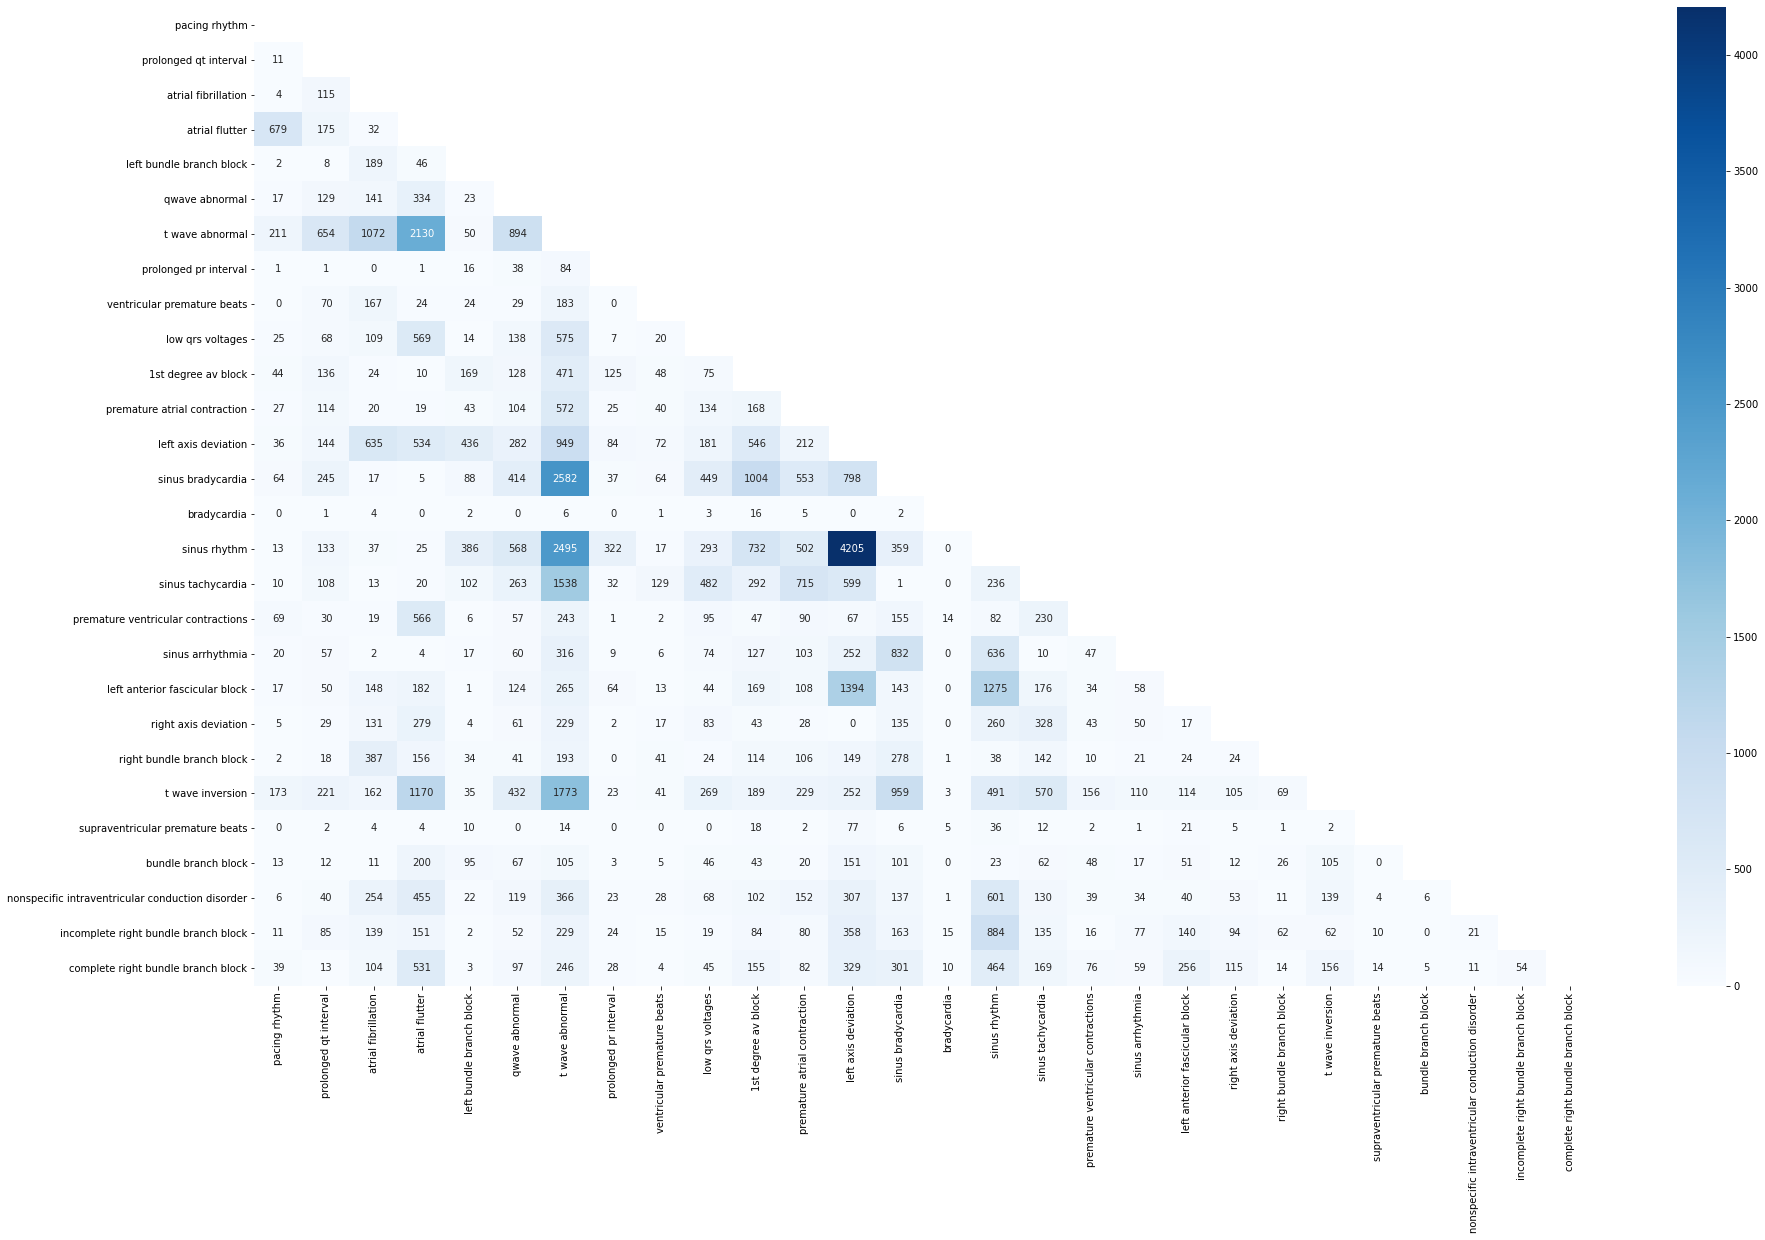

In [ ]:
plt.figure(figsize=(30,18))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, annot=True,annot_kws={"size": 10},fmt=".0f", cmap="Blues")
plt.show()